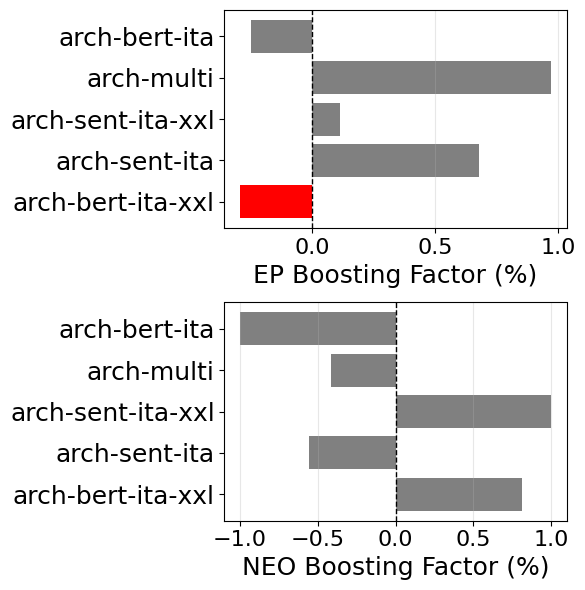

✅ Plot saved to /home/michele.maggini/XAI_HIPP/IG/results_EP_NEO_LL_analysis/summary/cross_model_boosting_comparison_vertical.png


In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
CSV_PATH = "/home/michele.maggini/XAI_HIPP/IG/results_EP_NEO_LL_analysis/summary/all_models_interactions.csv"
SUMMARY_DIR = os.path.dirname(CSV_PATH)

# === LOAD DATA ===
all_interactions = pd.read_csv(CSV_PATH)

# === PLOT BOOSTING FACTORS ACROSS MODELS ===
if not all_interactions.empty:
    fig, axes = plt.subplots(2, 1, figsize=(6, 6))  # 2 rows, 1 column

    # --- EPITHET ---
    ep_interactions = all_interactions[all_interactions['trait'] == 'Epithet']
    if not ep_interactions.empty:
        models = ep_interactions['model'].values
        boosting = ep_interactions['boosting_factor'].values
        ablation_sig = ep_interactions['ablation_significant'].values
        colors = ['red' if sig else 'gray' for sig in ablation_sig]

        axes[0].barh(range(len(models)), boosting, color=colors)
        axes[0].set_yticks(range(len(models)))
        axes[0].set_yticklabels(models, fontsize=18)
        axes[0].axvline(0, color='black', linestyle='--', linewidth=1)
        axes[0].set_xlabel('EP Boosting Factor (%)', fontsize=18)
        axes[0].tick_params(axis='x', labelsize=16)  # 🔹 increase x-axis number font size
        axes[0].grid(True, alpha=0.3, axis='x')

    # --- NEOLOGISM ---
    neo_interactions = all_interactions[all_interactions['trait'] == 'Neologism']
    if not neo_interactions.empty:
        models = neo_interactions['model'].values
        boosting = neo_interactions['boosting_factor'].values
        ablation_sig = neo_interactions['ablation_significant'].values
        colors = ['red' if sig else 'gray' for sig in ablation_sig]

        axes[1].barh(range(len(models)), boosting, color=colors)
        axes[1].set_yticks(range(len(models)))
        axes[1].set_yticklabels(models, fontsize=18)
        axes[1].axvline(0, color='black', linestyle='--', linewidth=1)
        axes[1].set_xlabel('NEO Boosting Factor (%)', fontsize=18)
        axes[1].tick_params(axis='x', labelsize=16)  # 🔹 increase x-axis number font size
        axes[1].grid(True, alpha=0.3, axis='x')

    plt.tight_layout()
    output_path = os.path.join(SUMMARY_DIR, 'cross_model_boosting_comparison_vertical.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    print(f"✅ Plot saved to {output_path}")

else:
    print("⚠️ The CSV file is empty or missing expected data.")
